# Car Accident Severity

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
%matplotlib inline

<h2>Reading the data set from the URL and adding the related headers.</h2>

In [2]:
filename="https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df=pd.read_csv(filename)
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


<h4>Catch The Needed Columns</h4>

In [3]:
data=df[['SEVERITYCODE','COLLISIONTYPE','ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND']]
data.head()

,SEVERITYCODE,COLLISIONTYPE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,Angles,Intersection,Overcast,Wet,Daylight
1,1,Sideswipe,Block,Raining,Wet,Dark - Street Lights On
2,1,Parked Car,Block,Overcast,Dry,Daylight
3,1,Other,Block,Clear,Dry,Daylight
4,2,Angles,Intersection,Raining,Wet,Daylight


dentify_missing_values

<h4>Evaluating for Missing Data</h4>

In [4]:
missing_data = data.isnull()
missing_data.head(5)
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64



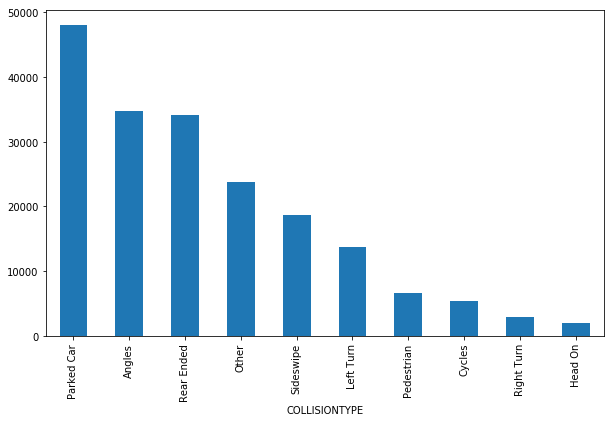

In [6]:
visual=data['COLLISIONTYPE'].value_counts().rename_axis('COLLISIONTYPE')
visual.head()
visual.plot(kind='bar', figsize=(10, 6))

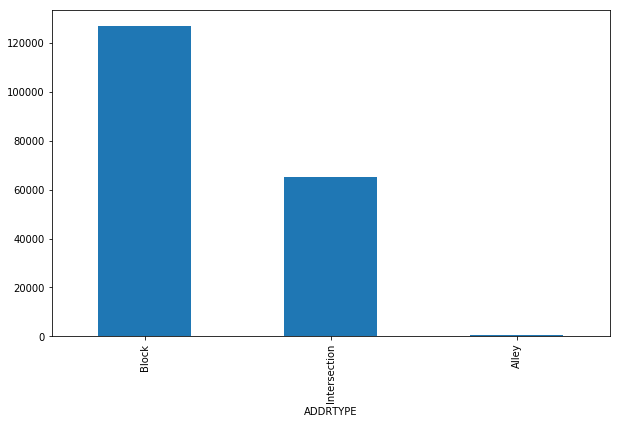

In [7]:
visual=data['ADDRTYPE'].value_counts().rename_axis('ADDRTYPE')
visual.head()
visual.plot(kind='bar', figsize=(10, 6))

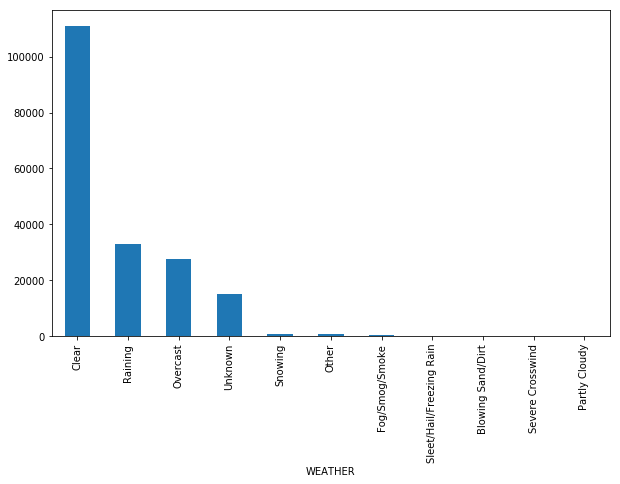

In [9]:
visual=data['WEATHER'].value_counts().rename_axis('WEATHER')
visual.head()
visual.plot(kind='bar', figsize=(10, 6))

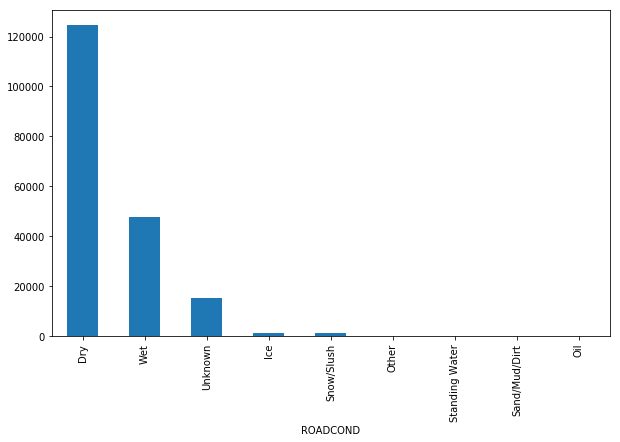

In [10]:
visual=data['ROADCOND'].value_counts().rename_axis('ROADCOND')
visual.head()
visual.plot(kind='bar', figsize=(10, 6))

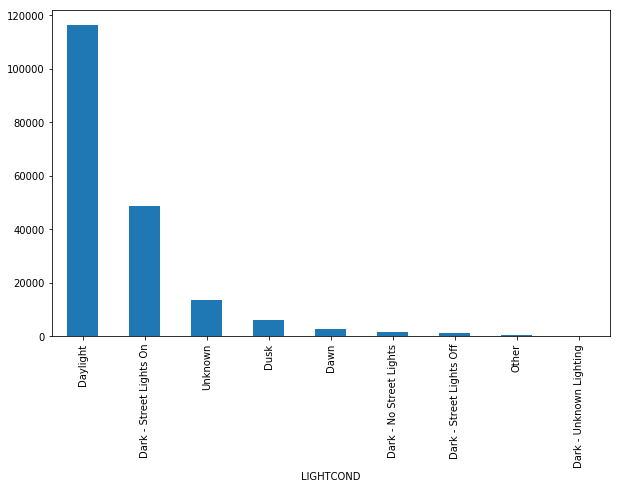

In [11]:
visual=data['LIGHTCOND'].value_counts().rename_axis('LIGHTCOND')
visual.head()
visual.plot(kind='bar', figsize=(10, 6))

In [12]:
data.shape

(194673, 6)

##### Drope Missing values for Colisiontype and Adress Type

In [15]:
data.dropna(subset=["COLLISIONTYPE"], axis=0, inplace=True)
data.dropna(subset=["ADDRTYPE"], axis=0, inplace=True)

data.reset_index(drop=True, inplace=True)


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/l

##### Replace The Missing Values for the columuns weather, road condition and light condition

In [30]:
data["WEATHER"].replace(np.nan, 'Clear', inplace=True)
data["ROADCOND"].replace(np.nan, 'Dry', inplace=True)
data["LIGHTCOND"].replace(np.nan, 'Daylight', inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [16]:
data.head()

,SEVERITYCODE,COLLISIONTYPE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,Angles,Intersection,Overcast,Wet,Daylight
1,1,Sideswipe,Block,Raining,Wet,Dark - Street Lights On
2,1,Parked Car,Block,Overcast,Dry,Daylight
3,1,Other,Block,Clear,Dry,Daylight
4,2,Angles,Intersection,Raining,Wet,Daylight


In [17]:
data.describe(include='all')

,SEVERITYCODE,COLLISIONTYPE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND
count,187504.000000,187504,187504,187504,187504,187504
unique,NaN,10,3,11,9,9
top,NaN,Parked Car,Block,Clear,Dry,Daylight
freq,NaN,46679,123315,110493,123730,115395
mean,1.303300,NaN,NaN,NaN,NaN,NaN
std,0.459685,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN
25%,1.000000,NaN,NaN,NaN,NaN,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN


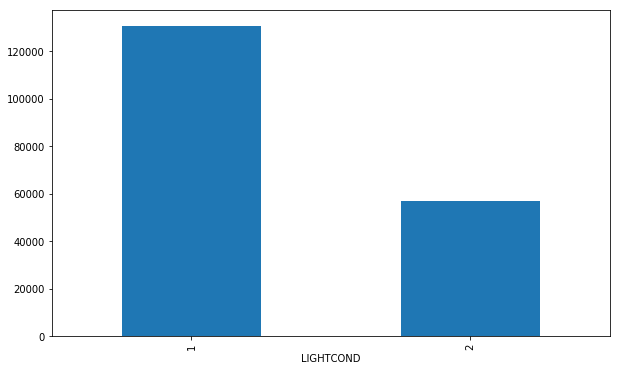

In [18]:
visual=data['SEVERITYCODE'].value_counts().rename_axis('LIGHTCOND')
visual.plot(kind='bar', figsize=(10, 6))

## III-Data Analysis

## 1-Decision Tree

In [19]:
X = data[['COLLISIONTYPE','ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND']].values

In [20]:
from sklearn import preprocessing
le_COLLISIONTYPE= preprocessing.LabelEncoder()
le_COLLISIONTYPE.fit(['Parked Car','Angles','Rear Ended','Other','Sideswipe','Left Turn','Pedestrian','Cycles','Right Turn','Head On'])
X[:,0] = le_COLLISIONTYPE.transform(X[:,0]) 


le_ADDRTYPE = preprocessing.LabelEncoder()
le_ADDRTYPE.fit([ 'Block', 'Intersection', 'Alley'])
X[:,1] = le_ADDRTYPE.transform(X[:,1])


le_WEATHER = preprocessing.LabelEncoder()
le_WEATHER.fit([ 'Clear', 'Raining','Overcast','Unknown','Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'])
X[:,2] = le_WEATHER.transform(X[:,2]) 

le_ROADCOND = preprocessing.LabelEncoder()
le_ROADCOND.fit([ 'Dry', 'Wet', 'Unknown','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil'])
X[:,3] = le_ROADCOND.transform(X[:,3])

le_LIGHTCOND = preprocessing.LabelEncoder()
le_LIGHTCOND.fit([ 'Daylight', 'Dark - Street Lights On', 'Unknown','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Other','Dark - Unknown Lighting'])
X[:,4] = le_LIGHTCOND.transform(X[:,4])

X[0:5]


array([[0, 2, 4, 8, 5],
       [9, 1, 6, 8, 2],
       [5, 1, 4, 0, 5],
       [4, 1, 1, 0, 5],
       [0, 2, 6, 8, 5]], dtype=object)

In [21]:
data['LIGHTCOND'].value_counts()

Daylight                    115395
Dark - Street Lights On      48233
Unknown                      12597
Dusk                          5842
Dawn                          2490
Dark - No Street Lights       1525
Dark - Street Lights Off      1184
Other                          227
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [22]:
y=data['SEVERITYCODE']

In [23]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [24]:
AccTree=DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [25]:
AccTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
predTree = AccTree.predict(X_testset)

In [27]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7253075446206357
